In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Memuat dataset Mall_Customers dari file CSV
data = pd.read_csv('Mall_Customers.csv')

# Tampilkan beberapa baris pertama dari dataset
print(data.head())

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Risma\AppData\Local\Temp\ipykernel_10092\986947404.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data[data['DBSCAN_Cluster'] != -1],


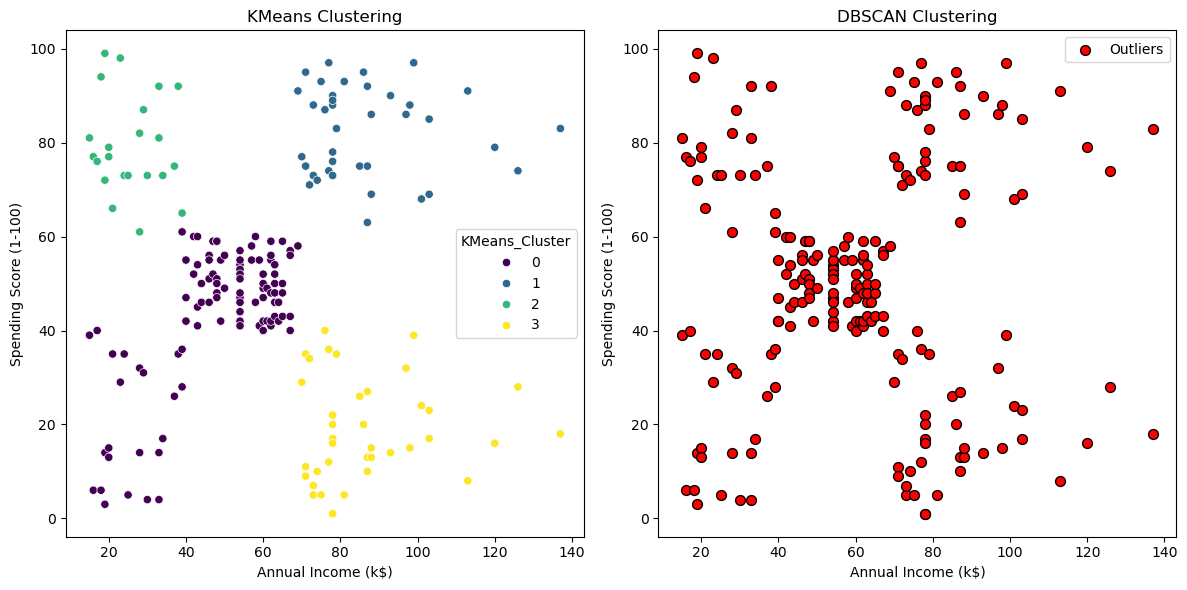

In [35]:
# Visualisasi hasil KMeans dan DBSCAN dalam satu figure
plt.figure(figsize=(12, 6))

# Subplot untuk KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='KMeans_Cluster', palette='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Subplot untuk DBSCAN
plt.subplot(1, 2, 2)
# Plot data tanpa outliers
sns.scatterplot(data=data[data['DBSCAN_Cluster'] != -1], 
                x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='DBSCAN_Cluster', palette='viridis', marker='o', legend='full')
# Plot outliers dengan warna berbeda
outliers = data[data['DBSCAN_Cluster'] == -1]
plt.scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], 
            color='red', s=50, label='Outliers', edgecolor='k')

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()


In [39]:
# Hitung dan cetak silhouette score untuk masing-masing metode
kmeans_silhouette = silhouette_score(X, data['KMeans_Cluster'])
# Untuk DBSCAN, pastikan ada lebih dari satu cluster
if len(set(data['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(X, data['DBSCAN_Cluster'])
else:
    dbscan_silhouette = -1  # Jika tidak ada cluster yang valid

print(f'Silhouette Score KMeans: {kmeans_silhouette}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette}')


Silhouette Score KMeans: 0.4937945814354117
Silhouette Score DBSCAN: -1


In [21]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,DBSCAN_Cluster
0,1,Male,19,15,39,0,-1
1,2,Male,21,15,81,2,-1
2,3,Female,20,16,6,0,-1
3,4,Female,23,16,77,2,-1
4,5,Female,31,17,40,0,-1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,-1
196,197,Female,45,126,28,3,-1
197,198,Male,32,126,74,1,-1
198,199,Male,32,137,18,3,-1


C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


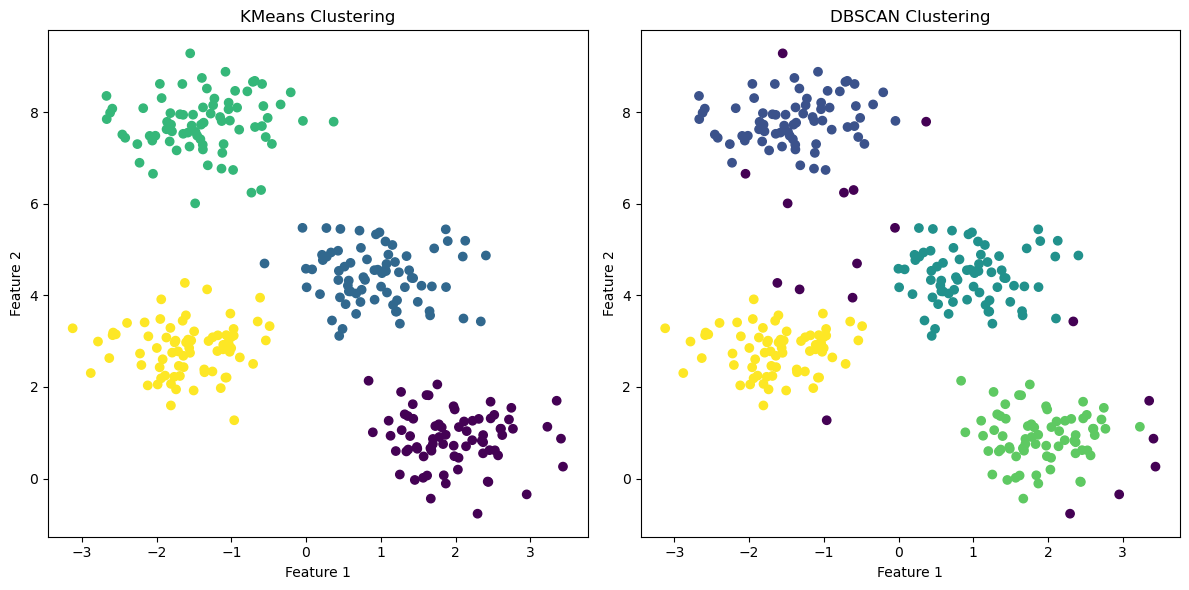

Silhouette Score KMeans: 0.6819938690643478
Silhouette Score DBSCAN: 0.6303800996842714


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Buat dataset buatan
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Konversi data menjadi DataFrame
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Clustering menggunakan KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Menambahkan random_state untuk reproduksibilitas
data['KMeans_Cluster'] = kmeans.fit_predict(X)

# Clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualisasi hasil KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['KMeans_Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualisasi hasil DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Hitung dan cetak silhouette score untuk masing-masing metode
kmeans_silhouette = silhouette_score(X, data['KMeans_Cluster'])
# Untuk DBSCAN, pastikan ada lebih dari satu cluster
if len(set(data['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(X, data['DBSCAN_Cluster'])
else:
    dbscan_silhouette = -1  # Jika tidak ada cluster yang valid

print(f'Silhouette Score KMeans: {kmeans_silhouette}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette}')
